# Quantum Walk

### The First Quantized Version

The first quantized version uses $\log_2N$ qubits to represent the particle's position, where $N$ is the number of sites in the walk. For example, if $N=4$, we would use two qubis, and the basis states $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$ would indicate the particle at the first, second, third, and fourth site, respectively. The first quantized version uses an additional qubit to store the velocity, or direction, of the particle. The state $|0xx\rangle$ indicates the particle moving to the right, and the state $|1xx\rangle$ indicates the particle moving to the left. Overall, the first quantized version requires $\log_2 N+1$ qubits.

![fig1](fig/fig1.png)

A visualization of how the first quantized version utilizes qubits. Four sites are shown as circles and labelled using two qubits. The velocity is shown as two arrows, with the right-pointing arrow labblled by the $|0\rangle$ state and corresponding to $a+1$ velocity, and the left-pointing arrow labelled by the $|1\rangle$ sates and corresponding to $a-1$ velocity.

In [2]:
import random as rand
import qiskit
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit import Aer, quantum_info
from qiskit.circuit.library import XGate, U3Gate

In [3]:
backend = Aer.get_backend('aer_simulator')

In [4]:
# velocity
qc3 = QuantumCircuit(1)
theta = np.pi*0.5
phi = 0.0 # np.pi*0.5
lam = 0.0 #-np.pi*0.5
gate = U3Gate(theta,phi,lam,label='U3')
qc3.append(gate,[0])
qc3.measure_all()

result = backend.run(qc3).result()
result.get_counts()

{'0': 532, '1': 492}

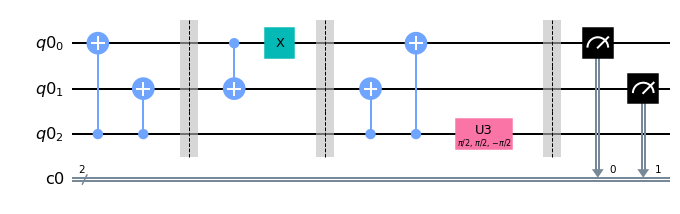

In [5]:
# N=4 circuit

qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)
qc.cx(qr[2],qr[0])
qc.cx(qr[2],qr[1])
qc.barrier()
qc.cx(qr[0],qr[1])
qc.x(qr[0])
qc.barrier()
qc.cx(qr[2],qr[1])
qc.cx(qr[2],qr[0])

theta = np.pi*0.5
phi = np.pi*0.5
lam = -np.pi*0.5
gate = U3Gate(theta,phi,lam,label='U3')
qc.append(gate,[2])
qc.barrier()

qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])

qc.draw('mpl')

In [6]:
result = backend.run(qc).result()
counts = result.get_counts()

In [7]:
counts

{'01': 1024}

In [8]:
def propagater():
    qr = QuantumRegister(3)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)
    qc.cx(qr[2],qr[0])
    qc.cx(qr[2],qr[1])
    qc.barrier()
    qc.cx(qr[0],qr[1])
    qc.x(qr[0])
    qc.barrier()
    qc.cx(qr[2],qr[1])
    qc.cx(qr[2],qr[0])

    theta = np.pi*0.5
    phi = np.pi*0.5
    lam = -np.pi*0.5
    gate = U3Gate(theta,phi,lam,label='U3')
    qc.append(gate,[2])
    qc.barrier()
    
    return qc

In [9]:
a = propagater()
a2 = propagater()

## Under construction

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table